In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.patches import Circle, PathPatch

In [2]:
df = pd.read_csv('exercise_data.txt',delim_whitespace=True)

In [3]:
print(df)

          x1        x2
0   0.724900  0.025800
1  -0.443300  0.112100
2  -0.894500  0.324500
3   0.355263  1.000000
4   0.350000 -0.780000
5   0.100000       NaN
6   0.001000 -0.990000
7   0.100000  0.500000
8   0.192400 -0.947000
9  -0.300000  0.870000
10  0.388000  0.917000
11 -0.719900  0.229300
12  0.501100 -0.046666
13  0.278000 -0.871000


Estimate =  3.4285714285714284


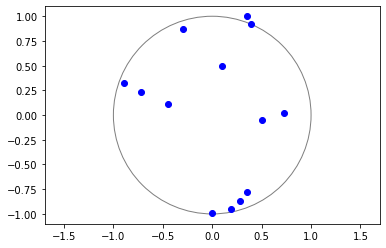

In [5]:
fig, ax = plt.subplots()

circle = Circle((0, 0), 1, facecolor='none',
                edgecolor='k', linewidth=1, alpha=0.5)
ax.add_patch(circle)

plt.plot(df['x1'],df['x2'],'ob')

print('Estimate = ', 4.0*np.sum((df['x1']**2 + df['x2']**2) < 1.0) / df.shape[0])


ax.axis('equal')
plt.show()


Estimate =  3.1256


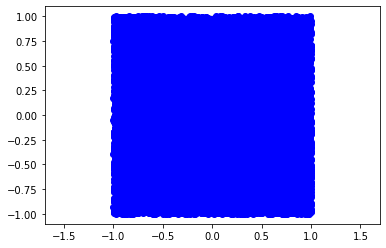

In [12]:
xs = 2.0*np.random.rand(20000,2) - 1

fig, ax = plt.subplots()

circle = Circle((0, 0), 1, facecolor='none',
                edgecolor='k', linewidth=1, alpha=0.5)
ax.add_patch(circle)

plt.plot(xs[:,0],xs[:,1],'ob')

print('Estimate = ', 4.0*np.sum((xs[:,0]**2 + xs[:,1]**2) < 1.0) / xs.shape[0])

ax.axis('equal')
plt.show()

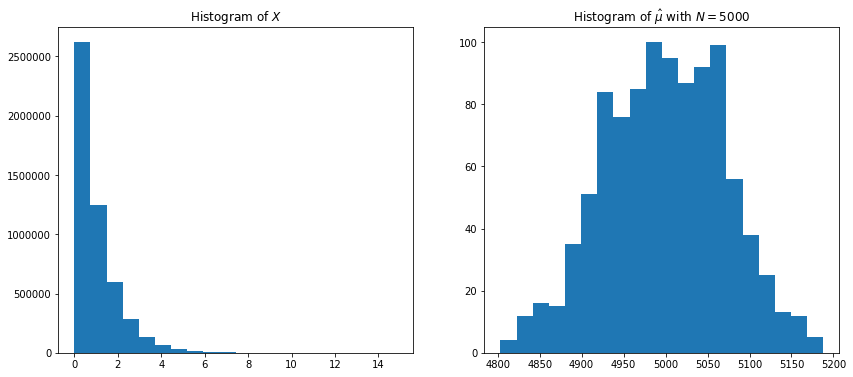

In [18]:
block_size = 5000
num_blocks = 1000
num_samps = num_blocks*block_size

samps = stats.gamma.rvs(1.0, size=(num_blocks,block_size))


fig, axs = plt.subplots(ncols=2,figsize=(14,6))
axs[0].hist(samps.ravel(),20)
axs[0].set_title('Histogram of $X$')

axs[1].hist(np.sum(samps,axis=1),20)
axs[1].set_title('Histogram of $\hat{\mu}$ with $N=%d$'%block_size)

plt.show()

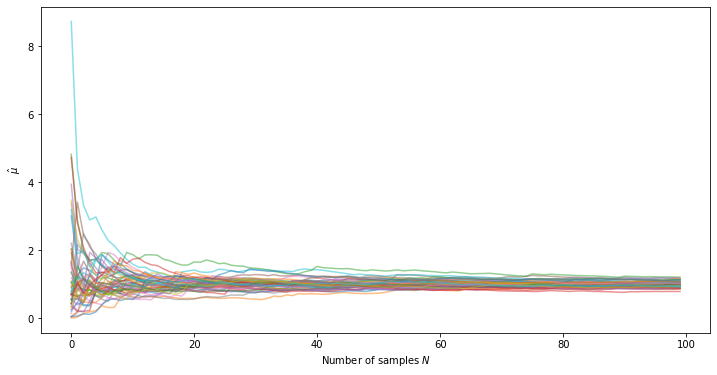

In [53]:

plt.figure(figsize=(12,6))
plt.plot((np.cumsum(samps[0:50,:],axis=1) / np.arange(1,block_size+1)).T, alpha=0.5)

plt.xlabel('Number of samples $N$')
plt.ylabel('$\hat{\mu}$')
plt.show()
